In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

In [24]:
#importlib.import_module(package='./0_readSpectra')

In [25]:
svc_spectra = pd.read_csv('./MinispectTrials/Spectra_ALL.csv')
print(svc_spectra.head())

   SR     FileName       Date     Time AMPM  WVL_339.0  WVL_340.5  WVL_342.0  \
0   0  1a_0000.sig  5/27/2021  3:58:03   PM       7.94       5.95       6.05   
1   1  1a_0001.sig  5/27/2021  3:58:03   PM       7.07       6.94       6.78   
2   2  1a_0002.sig  5/27/2021  3:58:03   PM       9.60       9.26       8.47   
3   3  1b_0000.sig  5/27/2021  4:00:25   PM       5.15       5.19       4.74   
4   4  1b_0001.sig  5/27/2021  4:00:25   PM       5.67       5.66       5.60   

   WVL_343.5  WVL_345.0  ...  WVL_2496.8  WVL_2499.0  WVL_2501.2  WVL_2503.4  \
0       6.49       6.85  ...        5.44        5.37        5.40        5.34   
1       6.82       6.51  ...        5.24        5.37        5.47        5.42   
2       8.33       8.22  ...        5.72        5.73        5.54        5.19   
3       4.26       4.26  ...        4.61        4.53        4.69        4.52   
4       5.04       4.96  ...        4.48        4.46        4.48        4.59   

   WVL_2505.7  WVL_2507.9  WVL_2510.1 

In [149]:
svc_wavelengths = [float(x[4:]) for x in svc_spectra.filter(regex='^WVL_').columns.tolist()]

### Basic parsing of raw minispect data

In [73]:
def scansToArray(filename='scans.txt'):
    scanfile = open(filename, 'r')
    pd.DataFrame()
    name=''
    integration=''
    scans = []

    for line in scanfile:
        line=line.strip()
        colon = line.find(':')
        if(line==''):
            continue
        elif(colon != -1):
            name = line[:colon]
            integration = line[colon+1:]
        else:        
            data = line.split(' ')
            scan = {'name':name, 'integration':integration, 'data':data}
            scans.append(scan)
    return scans


### Create a Pandas Dataframe from raw data dictionary

In [239]:
minispect_spectra = pd.DataFrame.from_dict(scansToArray())
minispect_wavelengths = np.linspace(340,850,288)
print(minispect_spectra)

    name integration                                               data
0    Ref         1ms  [184, 179, 181, 177, 172, 172, 168, 171, 168, ...
1    Ref         1ms  [179, 178, 181, 176, 172, 170, 169, 169, 168, ...
2    Ref         1ms  [184, 180, 181, 178, 174, 172, 170, 169, 170, ...
3    Ref         1ms  [182, 178, 181, 178, 174, 173, 168, 167, 168, ...
4    Ref         1ms  [182, 180, 182, 178, 173, 173, 171, 170, 169, ...
..   ...         ...                                                ...
100   5a         2ms  [242, 239, 238, 229, 224, 221, 214, 212, 208, ...
101   5a         2ms  [240, 235, 236, 228, 222, 221, 215, 214, 211, ...
102   5a         2ms  [241, 237, 232, 231, 223, 222, 216, 213, 211, ...
103   5a         2ms  [239, 235, 236, 227, 221, 218, 216, 212, 208, ...
104   5a         2ms  [239, 232, 236, 227, 221, 219, 212, 208, 208, ...

[105 rows x 3 columns]


In [240]:
average_reference = np.mean(np.array(minispect_spectra[minispect_spectra['name'].str.contains('Ref')].data.tolist()).astype(int), axis=0)

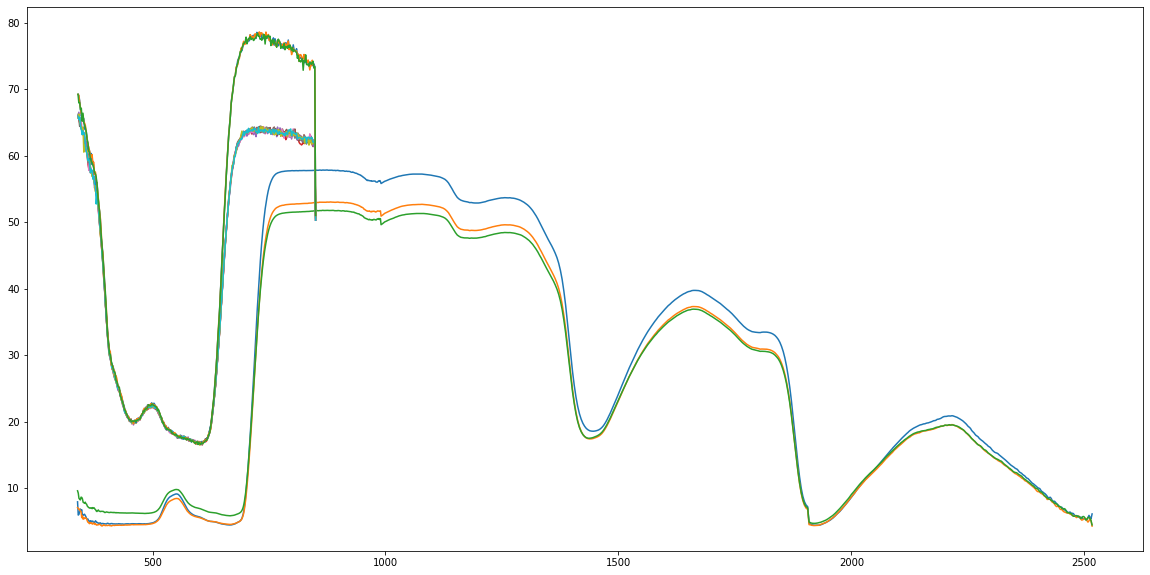

In [245]:
def plotSpectra(names):
    for name in names:
        svc_data = svc_spectra[svc_spectra['FileName'].str.contains(name)].filter(regex='^WVL_')
        ms_data = minispect_spectra[minispect_spectra['name'].str.contains(name)].data
        #print(ms_dataaverage_reference)
        plt.figure(figsize=(20,10))

        for svc in svc_data.iterrows():
            plt.plot(svc_wavelengths,svc[1])
        for ms in ms_data:
            ms = [float(x) for x in ms]
            plt.plot(minispect_wavelengths, (ms/average_reference)*50)
            #print(ms/average_reference*50)
            
        plt.show()

plotSpectra(['1a'])